In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
from google.colab import files 
files.upload()

Saving RiceLeaf.zip to RiceLeaf.zip


In [9]:
!unzip RiceLeaf.zip

Archive:  RiceLeaf.zip
   creating: RiceLeaf/Rice/
   creating: RiceLeaf/Rice/blast/
  inflating: RiceLeaf/Rice/blast/IMG_0448.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0535.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0536.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0541.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0543.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0544.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0545.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0546.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0547.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0548.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0549.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0550.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0551.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0553.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0557.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0558.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0559.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0560.jpg  
  inflating: RiceLeaf/Rice/blast/IMG_0561.jpg  
  i

In [10]:
directory = '/content/RiceLeaf/Rice'

In [11]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['tungro', 'blast', 'blight']
3


In [12]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [13]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<60:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [14]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [15]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [16]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [17]:
print(len(labels))
print(len(tlabels))

180
60


In [18]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [19]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(144, 100, 100, 3)
(36, 100, 100, 3)
(144, 3)
(36, 3)


In [20]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [21]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [22]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
5/5 [==============================] - 22s 3s/step - loss: 1.3559 - accuracy: 0.4792 - val_loss: 1.1591 - val_accuracy: 0.4722
Epoch 2/30
5/5 [==============================] - 8s 2s/step - loss: 0.6127 - accuracy: 0.7292 - val_loss: 0.6400 - val_accuracy: 0.6944
Epoch 3/30
5/5 [==============================] - 8s 2s/step - loss: 0.4381 - accuracy: 0.8333 - val_loss: 0.5075 - val_accuracy: 0.7778
Epoch 4/30
5/5 [==============================] - 8s 2s/step - loss: 0.4000 - accuracy: 0.8056 - val_loss: 0.4541 - val_accuracy: 0.7778
Epoch 5/30
5/5 [==============================] - 8s 2s/step - loss: 0.3402 - accuracy: 0.8333 - val_loss: 0.3376 - val_accuracy: 0.7778
Epoch 6/30
5/5 [==============================] - 8s 2s/step - loss: 0.2643 - accuracy: 0.9167 - val_loss: 0.4443 - val_accuracy: 0.8611
Epoch 7/30
5/5 [==============================] - 8s 2s/step - loss: 0.2675 - accuracy: 0.8958 - val_loss: 0.3545 - val_accuracy: 0.9167
Epoch 8/30
5/5 [========================

In [25]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.92      0.92      0.92        13
           2       1.00      0.62      0.77         8

    accuracy                           0.89        36
   macro avg       0.92      0.85      0.87        36
weighted avg       0.90      0.89      0.88        36



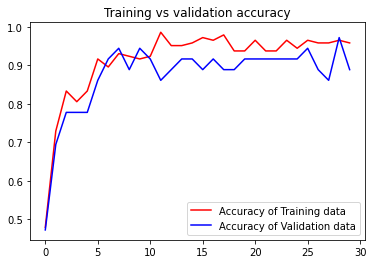

<Figure size 432x288 with 0 Axes>

In [26]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

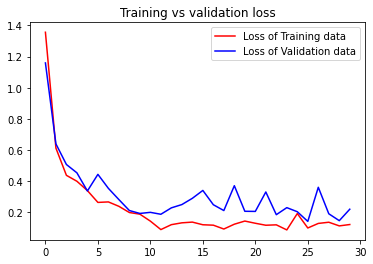

<Figure size 432x288 with 0 Axes>

In [27]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

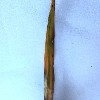

In [28]:
load_img("/content/RiceLeaf/Rice/tungro/IMG_1028.jpg",target_size=(100,100))

In [29]:
image=load_img("/content/RiceLeaf/Rice/tungro/IMG_1028.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [30]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is tungro.


In [31]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(60, 100, 100, 3)
(60, 3)


In [32]:
ANS=tlabels0

In [33]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.85
